* list 1
* list 2

# First Section
# Second Section
## First Subsection

In [17]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# load csv file

In [2]:
#can use parse_dates=['Date/Time'] - but code along goes different route
data = pd.read_csv('uber-raw-data-apr14.csv')

In [3]:
data.head()

,Date/Time,Lat,Lon,Base
0,4/1/2014 0:11:00,40.7690,-73.9549,B02512
1,4/1/2014 0:17:00,40.7267,-74.0345,B02512
2,4/1/2014 0:21:00,40.7316,-73.9873,B02512
3,4/1/2014 0:28:00,40.7588,-73.9776,B02512
4,4/1/2014 0:33:00,40.7594,-73.9722,B02512


In [4]:
data.tail()

,Date/Time,Lat,Lon,Base
564511,4/30/2014 23:22:00,40.7640,-73.9744,B02764
564512,4/30/2014 23:26:00,40.7629,-73.9672,B02764
564513,4/30/2014 23:31:00,40.7443,-73.9889,B02764
564514,4/30/2014 23:32:00,40.6756,-73.9405,B02764
564515,4/30/2014 23:48:00,40.6880,-73.9608,B02764


In [37]:
#could do this but not effective
date = '4/30/2014 23:22:00'
d, t = date.split(' ')
month, day, year = d.split('/')
hour, minute, second = t.split(':')
print(d)
print(month)
print(day)
print(year)
print(t)
print(hour)
print(minute)
print(second)

4/30/2014
4
30
2014
23:22:00
23
22
00


In [5]:
data['Date/Time'] = data['Date/Time'].map(pd.to_datetime)

In [6]:
def get_dom(dt):
    return dt.day
data['dom'] = data['Date/Time'].map(get_dom)
print(data.tail())

                 Date/Time      Lat      Lon    Base  dom
564511 2014-04-30 23:22:00  40.7640 -73.9744  B02764   30
564512 2014-04-30 23:26:00  40.7629 -73.9672  B02764   30
564513 2014-04-30 23:31:00  40.7443 -73.9889  B02764   30
564514 2014-04-30 23:32:00  40.6756 -73.9405  B02764   30
564515 2014-04-30 23:48:00  40.6880 -73.9608  B02764   30


In [7]:
def get_weekday(dt):
    return dt.weekday()
def get_hour(dt):
    return dt.hour
data['weekday'] = data['Date/Time'].map(get_weekday)
data['hour'] = data['Date/Time'].map(get_hour)
print(data.tail())

                 Date/Time      Lat      Lon    Base  dom  weekday  hour
564511 2014-04-30 23:22:00  40.7640 -73.9744  B02764   30        2    23
564512 2014-04-30 23:26:00  40.7629 -73.9672  B02764   30        2    23
564513 2014-04-30 23:31:00  40.7443 -73.9889  B02764   30        2    23
564514 2014-04-30 23:32:00  40.6756 -73.9405  B02764   30        2    23
564515 2014-04-30 23:48:00  40.6880 -73.9608  B02764   30        2    23


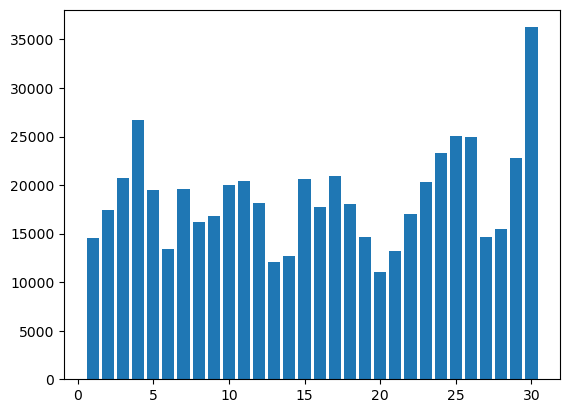

In [26]:
plt.hist(data.dom, bins=30, rwidth=0.8, range=(0.5, 30.5))
plt.show()

In [27]:
for i, rows in data.groupby('dom'):
    print(i, len(rows))


1 14546
2 17474
3 20701
4 26714
5 19521
6 13445
7 19550
8 16188
9 16843
10 20041
11 20420
12 18170
13 12112
14 12674
15 20641
16 17717
17 20973
18 18074
19 14602
20 11017
21 13162
22 16975
23 20346
24 23352
25 25095
26 24925
27 14677
28 15475
29 22835
30 36251


In [28]:
def count_rows(rows):
    return len(rows)
by_date = data.groupby('dom').apply(count_rows)
print(by_date)

dom
1     14546
2     17474
3     20701
4     26714
5     19521
6     13445
7     19550
8     16188
9     16843
10    20041
11    20420
12    18170
13    12112
14    12674
15    20641
16    17717
17    20973
18    18074
19    14602
20    11017
21    13162
22    16975
23    20346
24    23352
25    25095
26    24925
27    14677
28    15475
29    22835
30    36251
dtype: int64


In [29]:
by_date_sorted = by_date.sort_values()
print(by_date_sorted)

dom
20    11017
13    12112
14    12674
21    13162
6     13445
1     14546
19    14602
27    14677
28    15475
8     16188
9     16843
22    16975
2     17474
16    17717
18    18074
12    18170
5     19521
7     19550
10    20041
23    20346
11    20420
15    20641
3     20701
17    20973
29    22835
24    23352
26    24925
25    25095
4     26714
30    36251
dtype: int64


Text(0.5, 1.0, 'Title Goes Here')

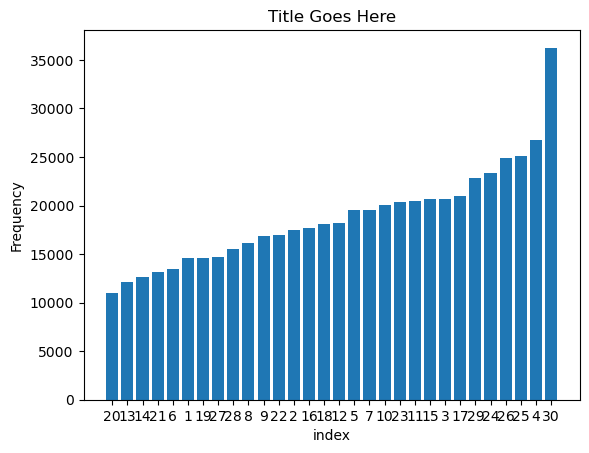

In [35]:
plt.bar(range(1, 31), by_date_sorted)
plt.xticks(range(1, 31), by_date_sorted.index)
plt.xlabel('index')
plt.ylabel('Frequency')
plt.title('Title Goes Here')

(array([ 7769.,  4935.,  5040.,  6095.,  9476., 18498., 24924., 22843.,
        17939., 17865., 18774., 19425., 22603., 27190., 35324., 42003.,
        45475., 43003., 38923., 36244., 36964., 30645., 20649.,     0.]),
 array([ 0.5       ,  1.47916667,  2.45833333,  3.4375    ,  4.41666667,
         5.39583333,  6.375     ,  7.35416667,  8.33333333,  9.3125    ,
        10.29166667, 11.27083333, 12.25      , 13.22916667, 14.20833333,
        15.1875    , 16.16666667, 17.14583333, 18.125     , 19.10416667,
        20.08333333, 21.0625    , 22.04166667, 23.02083333, 24.        ]),
 <BarContainer object of 24 artists>)

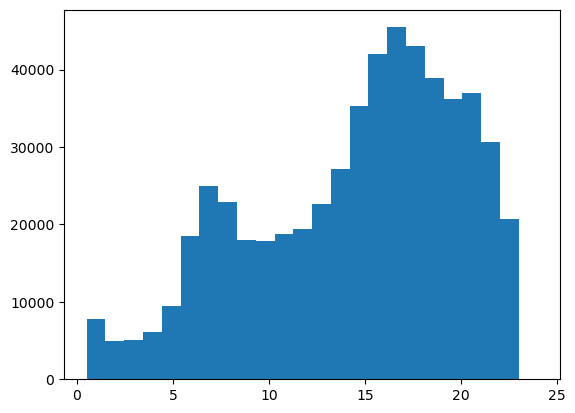

In [37]:
plt.hist(data.hour, bins=24, range=(.5, 24))

([<matplotlib.axis.XTick at 0x7fcaa86a8cd0>,
 [Text(0, 0, 'Mon'),
  Text(1, 0, 'Tues'),
  Text(2, 0, 'Wed'),
  Text(3, 0, 'Thurs'),
  Text(4, 0, 'Fri'),
  Text(5, 0, 'Sat'),
  Text(6, 0, 'Sun')])

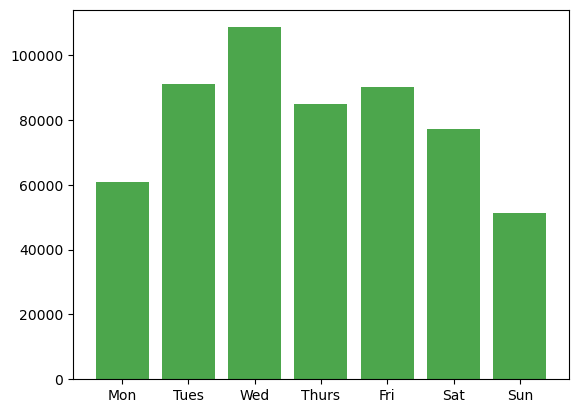

In [43]:
plt.hist(data.weekday, bins=7, range=(-.5, 6.5), color='green', rwidth=0.8, alpha=0.7)
plt.xticks(range(7), 'Mon Tues Wed Thurs Fri Sat Sun'.split(' '))

In [48]:
cross = data.groupby(['weekday', 'hour']).apply(count_rows).unstack()

In [45]:
by_h_d = data.groupby('hour weekday'.split(' ')).apply(count_rows)

hour  weekday
0     0           518
      1           765
      2           899
      3           792
      4          1367
                 ... 
23    2          2571
      3          2909
      4          5393
      5          5719
      6          1018
Length: 168, dtype: int64

<AxesSubplot:xlabel='hour', ylabel='weekday'>

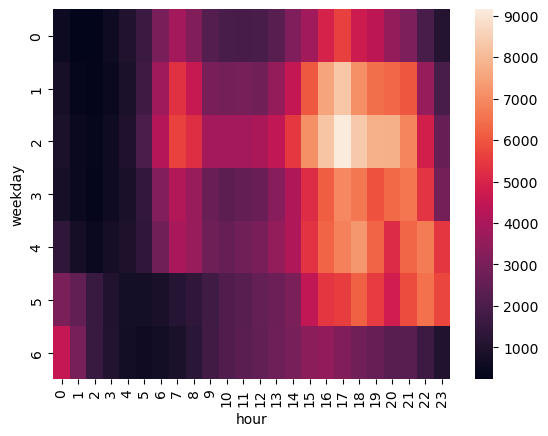

In [49]:
sns.heatmap(cross)